In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras import backend as K
from cleverhans.attacks import FastGradientMethod
from cleverhans.utils_keras import KerasModelWrapper

import sys
sys.path.append('../Final_notebook/')
import proj_utils as utils

Using TensorFlow backend.


In [2]:
model = load_model('../Saved_models/good_models/oid_3class/oid_3class_xception_083.h5')

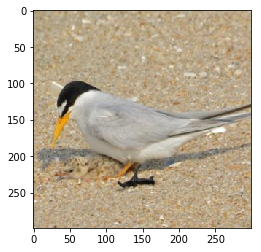

In [3]:
img1 = utils.load_image('../Data/bird_or_bicycle/0.0.3/test/bird/3ceee1ba9a1300ef.jpg')
plt.imshow(img1)

In [81]:
np.random.seed(42)
noise = 0.2 * np.random.uniform(size=(299, 299, 3))
noise.mean()

0.10008392650632282

In [82]:
noisy_img = np.clip(img + noise, 0, 1)
(noisy_img - img).mean()

0.09981703575479835

(array([27051., 26668., 26704., 26995., 26871., 26965., 27033., 26786.,
        26762., 26368.]),
 array([0.        , 0.01999984, 0.03999968, 0.05999952, 0.07999936,
        0.0999992 , 0.11999905, 0.13999889, 0.15999873, 0.17999857,
        0.19999841]),
 <a list of 10 Patch objects>)

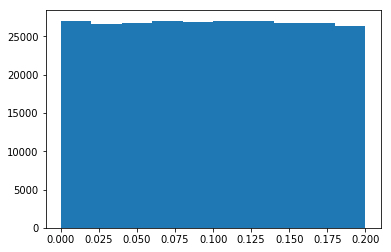

In [83]:
plt.hist((noisy_img - img).flatten())

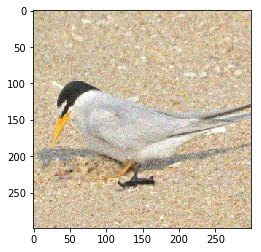

In [84]:
plt.imshow(noisy_img)

In [5]:
ch_model = KerasModelWrapper(model)
fgsm = FastGradientMethod(ch_model, sess=K.get_session())
fgsm_params = {'eps': 0.01, 'clip_min': 0.0, 'clip_max': 1.0}
adv = fgsm.generate_np(np.expand_dims(img1, axis=0), **fgsm_params)[0]

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



(<Figure size 720x648 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f301a5f6518>,
       dtype=object))

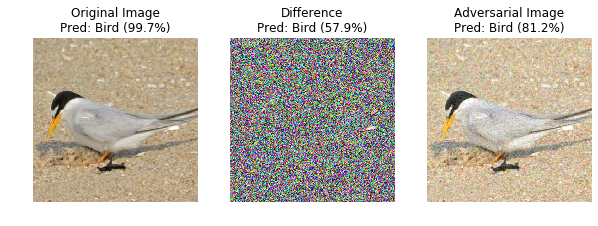

In [86]:
utils.plot_pair(img1, noisy_img, model)

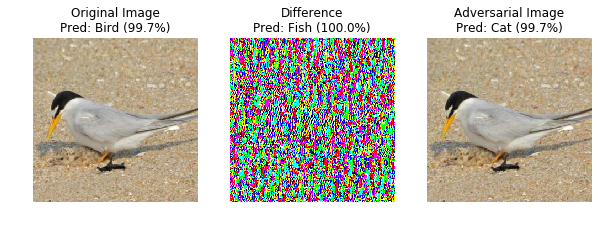

In [7]:
fig, ax = utils.plot_pair(img1, adv, model)
#plt.savefig('adv.png', bbox_inches='tight', pad_inches=0)

(array([1.33842e+05, 3.60000e+01, 1.70000e+01, 1.70000e+01, 4.00000e+00,
        4.00000e+01, 1.80000e+01, 1.80000e+01, 3.80000e+01, 1.34173e+05]),
 array([-0.05000001, -0.04000001, -0.03000001, -0.02000001, -0.01      ,
         0.        ,  0.01      ,  0.02000001,  0.03000001,  0.04000001,
         0.05000001], dtype=float32),
 <a list of 10 Patch objects>)

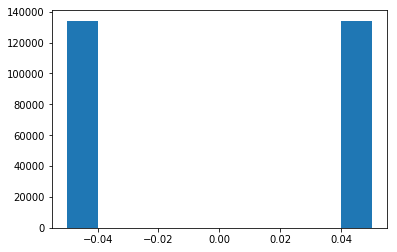

In [88]:
plt.hist((adv - img).flatten())

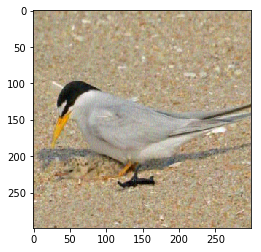

Unique Values:
['Bird', 'Cat', 'Fish']


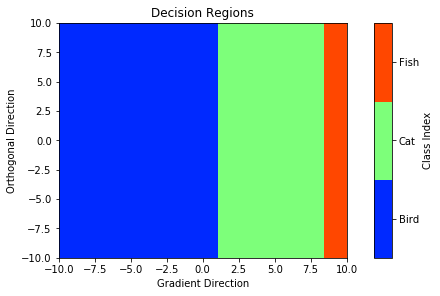

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f30183b5978>)

In [89]:
utils.decision_regions(img, model, img_label=np.array([[1, 0, 0]]), bounds=(-10, 10), num=20, img_ref=True)